In [39]:
import pandas as pd
import numpy as np
import os
import rebound

path = '/scratch/dtamayo/'
fcpath = path +'random/final_conditions/runs/fc'
shadowfcpath = path +'random/final_conditions/shadowruns/fc'
df = pd.read_csv(path+'random/random.csv', index_col=0)
df.tail()

,runstring
24995,0024995.bin
24996,0024996.bin
24997,0024997.bin
24998,0024998.bin
24999,0024999.bin


In [8]:
def get_times(row):   
    sim = rebound.Simulation.from_file(fcpath+row["runstring"])
    shadow = rebound.Simulation.from_file(shadowfcpath+row["runstring"])
    columns = ['t', 't_shadow']
    features = [sim.t, shadow.t]
    return pd.Series(features, index=columns)    

In [9]:
%%time
df = pd.concat([df, df.apply(get_times, axis=1)], axis=1)

/mnt/raid-cita/dtamayo/stability2/lib/python2.7/site-packages/rebound/simulation.py:374: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


CPU times: user 11.9 s, sys: 802 ms, total: 12.7 s
Wall time: 14.6 s


In [10]:
df.head()

,runstring,t,t_shadow
0,0000000.bin,1.235644e+07,8.315081e+07
1,0000001.bin,1.348749e+05,2.133072e+05
2,0000002.bin,1.276381e+04,9.321519e+03
3,0000003.bin,1.000000e+09,1.000000e+09
4,0000004.bin,8.791888e+01,8.791888e+01


In [11]:
df.to_csv('../csvs/deltatimes.csv', encoding='ascii')

In [13]:
df = pd.read_csv('../csvs/deltatimes.csv', index_col=0)
df.head()

,runstring,t,t_shadow
0,0000000.bin,1.235644e+07,8.315081e+07
1,0000001.bin,1.348749e+05,2.133072e+05
2,0000002.bin,1.276381e+04,9.321519e+03
3,0000003.bin,1.000000e+09,1.000000e+09
4,0000004.bin,8.791888e+01,8.791888e+01


In [18]:
df.loc[4]

runstring    0000004.bin
t                87.9189
t_shadow         87.9189
Name: 4, dtype: object

In [21]:
same = df[(df['t']==df['t_shadow']) & (df['t'] < 1.e9)]

In [22]:
same.shape

(3848, 3)

/mnt/raid-cita/dtamayo/stability2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47fe69ce90>]], dtype=object)

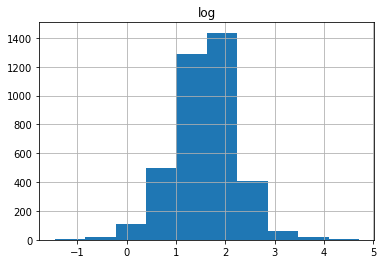

In [28]:
%matplotlib inline
same['log'] = np.log10(same['t'])
same.hist('log')

In [14]:
dfic = pd.read_csv('../csvs/initial_orbital_elements.csv', index_col=0)
dfic.head()

,runstring,Stable,instability_time,Rel_Eerr,RHill12,RHill23,beta12,beta23,m1,a1,...,Omega2,f2,m3,a3,P3,e3,pomega3,inc3,Omega3,f3
0,0000000.bin,0,1.235644e+07,1.099985e-04,0.026033,0.023222,8.508586,15.826967,3.414016e-05,1.0,...,1.573978,-0.567081,1.826900e-06,1.589043,2.003050,0.002515,-0.108162,0.065498,-1.192440,-0.614709
1,0000001.bin,0,1.348749e+05,1.388587e-08,0.022704,0.031284,8.397002,15.367618,2.529838e-07,1.0,...,-1.749616,1.437355,1.955797e-05,1.671403,2.160777,0.072450,-0.343874,0.046939,-0.619350,0.192203
2,0000002.bin,0,1.276381e+04,3.048261e-04,0.036304,0.032149,3.461288,25.229467,7.380789e-05,1.0,...,-0.032550,-0.317958,1.477931e-07,1.936762,2.695151,0.003395,3.419165,0.014535,2.795101,1.685406
3,0000003.bin,1,1.000000e+09,6.492574e-10,0.011704,0.014963,18.513681,19.145889,5.174804e-07,1.0,...,0.946351,-2.294238,1.287851e-06,1.503164,1.842927,0.057380,-0.829096,0.098014,-2.995941,-1.625763
4,0000004.bin,0,8.791888e+01,9.336734e-07,0.006199,0.008634,5.494196,2.928938,5.106746e-07,1.0,...,-0.455684,-1.074927,1.542321e-06,1.059346,1.090326,0.010325,-1.214839,0.011840,-1.253823,1.215392


In [36]:
df.loc[4, 't'] == dfic.loc[4, 'instability_time']

False

In [37]:
print("{0:.16e}".format(df.loc[4, 't']))

8.7918876543200000e+01


In [38]:
print("{0:.16e}".format(dfic.loc[4, 'instability_time']))

8.7918876543234333e+01


In [40]:
row=df.loc[4]
simf = rebound.Simulation.from_file(fcpath+row["runstring"])

In [41]:
simf.t

87.91887654323433